<a href="https://colab.research.google.com/github/Niushamesgari/Animal_Detection/blob/main/Using_RoboFLow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0TmfXz3UZSSiUMPMstoB")
project = rf.workspace("my-game-pics").project("my-game-pics")
version = project.version(5)
dataset = version.download("yolov8")





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to My-Game-Pics-5 in yolov8:: 100%|██████████| 19148/19148 [00:06<00:00, 2964.68it/s]


In [2]:
config_file_template = '''
names:
- Coyote
- Deer
- Hog
- Rabbit
- Raccoon
nc: 5
roboflow:
  license: CC BY 4.0
  project: my-game-pics
  url: https://universe.roboflow.com/my-game-pics/my-game-pics/dataset/5
  version: 5
  workspace: my-game-pics
test: /content/My-Game-Pics-5/test/images
train: /content/My-Game-Pics-5/train/images
val: /content/My-Game-Pics-5/valid/images

'''

with open('/content/My-Game-Pics-5/data.yaml', 'w') as f:
    f.write(config_file_template)

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 580.4 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [4]:
from ultralytics import YOLO
#model = YOLO('yolov8n.yaml').load('yolov8n.pt')
  # build from YAML and transfer weights

# Train the model
#results = model.train(data='/content/My-Game-Pics-5/data.yaml', epochs=20, imgsz=(644))

In [ ]:
model.export()

TypeError: 'IterableSimpleNamespace' object is not subscriptable

In [5]:
model = YOLO('/content/best (1).pt')


0: 512x640 1 Raccoon, 29.0ms
1: 512x640 2 Deers, 29.0ms
2: 512x640 1 Hog, 29.0ms
3: 512x640 (no detections), 29.0ms
Speed: 3.3ms preprocess, 29.0ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


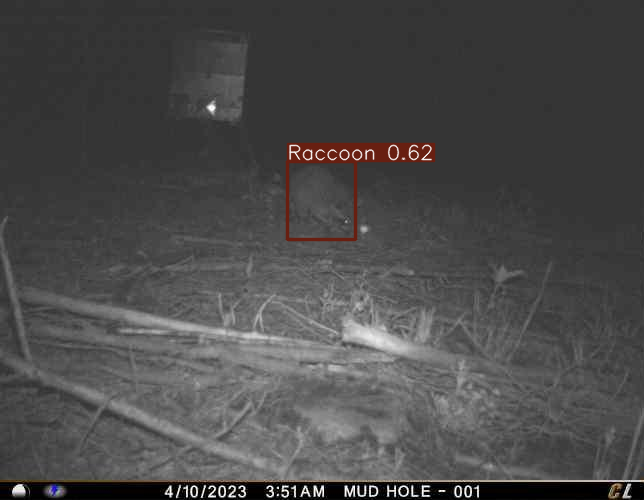

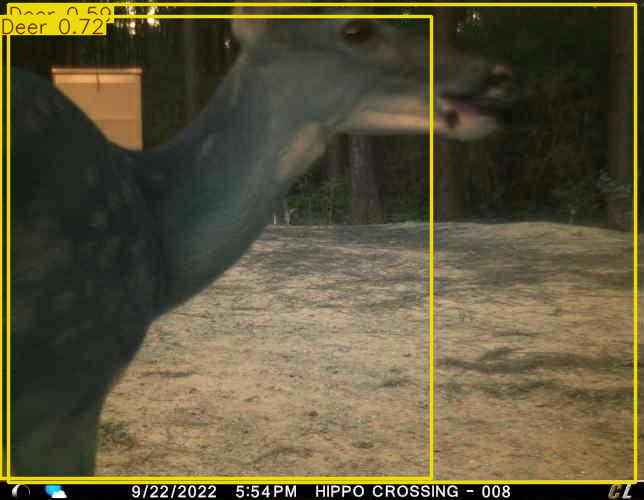

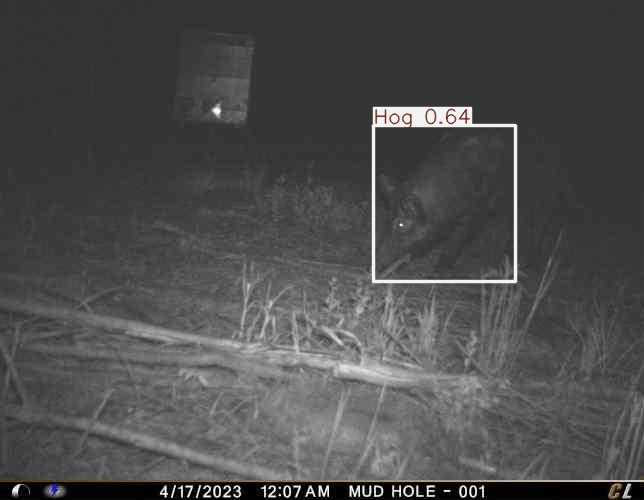

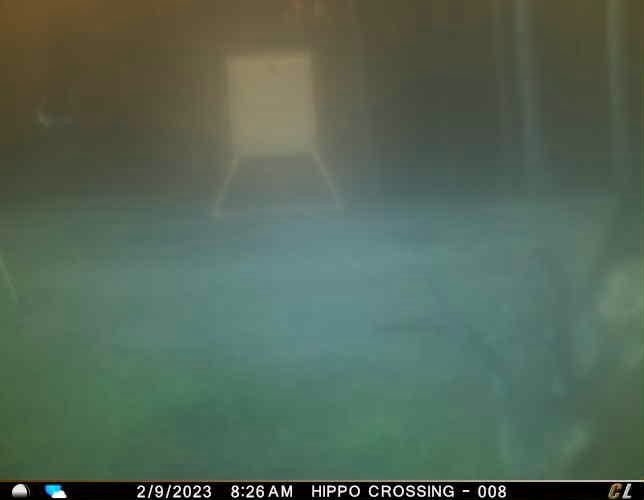

In [ ]:
import glob
from PIL import Image
test_image=glob.glob('/content/My-Game-Pics-5/test/images/*.jpg')
results=model(test_image[4:8],stream=False)
for i in range(4):
    res=results[i].plot()
    display(Image.fromarray(res))



In [ ]:
test_image=glob.glob('/content/6_class_final-1/test/images/*.jpg')
results=model(test_image[10],stream=False)
results[0].boxes.cls


image 1/1 /content/6_class_final-1/test/images/2835480_jpg.rf.6d8e662d5ce236ad6bc5d55116d35751.jpg: 416x416 1 container, 16.2ms
Speed: 1.6ms preprocess, 16.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


tensor([2.], device='cuda:0')

In [ ]:
!pip install --upgrade gradio==4.29

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
import gradio as gr


def detect_img(img):

  results=model([img],stream=False)
  res=results[0].plot()
  return Image.fromarray(res)


#them = gr.themes.Soft(primary_hue="sky", secondary_hue="stone", neutral_hue="neutral")


demo=gr.Interface(
    fn=detect_img,
    inputs=[gr.Image(format='pil')],
    outputs=[gr.Image(format = "pil")],
   # theme=them,
    title = "Farming Animal Detection App"
)


IMPORTANT: You are using gradio version 3.0, however version 4.29.0 is available, please upgrade.
--------


In [ ]:
demo.launch(debug=True,share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Could not create share link, please check your internet connection.
